# IBM DATA SCIENCE FINAL CAPSTONE PROJECT NOTEBOOK

I am creating clusters to find the appropriate location to open a reliable South Indian restaurant in the neighborhood of Toronto, Canada.

In [1]:
#importing necessary libraries
import requests
import pandas as pd
!pip -q install folium

In [2]:
#scrapping neighborhoods in Canada
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
df = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [4]:
#Drop the the rows on which the Borough is empty
df.dropna(subset=['Borough'], inplace=True)

In [5]:
#Check Neighborhood is empty but Borough exists
n_empty_neighborhood = df[df['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 1


In [6]:
#Show which neighborhood is emtpy but Borough exists
df[df['Neighbourhood'].isna()]

,Postcode,Borough,Neighbourhood
8,M7A,Queen's Park,NaN


In [7]:
#Replace empty Neighborhood with Borough name and check again
df['Neighbourhood'].fillna(df['Borough'], inplace=True)
n_empty_neighborhood = df[df['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [8]:
#Confirm that Queen's Park Neighborhood is not empty now:
df[df['Borough']=="Queen's Park"]

,Postcode,Borough,Neighbourhood
8,M7A,Queen's Park,Queen's Park


In [9]:
#Group by Postcode / Borough
df_postcodes = df.groupby(['Postcode','Borough']).Neighbourhood.agg([('Neighbourhood', ', '.join)])
df_postcodes.reset_index(inplace=True)
df_postcodes.head(5)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [10]:
#Drop the the rows on which the Borough is empty
df.dropna(subset=['Borough'], inplace=True)

In [11]:
#Check Neighborhood is empty but Borough exists
n_empty_neighborhood = df[df['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [12]:
print('The shape of the dataset is:',df_postcodes.shape)

The shape of the dataset is: (103, 3)


In [13]:
#to make it easier, we will store this in csv format.
#Export to .CSV
df_postcodes.to_csv('Toronto_Postcodes.csv')

We can use Geocoder package, but it is easier to use [CSV]('http://cocl.us/Geospatial_data') file

In [14]:
import numpy as np

In [15]:
#Read CSV file from link and load into dataframe
url_csv = 'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv(url_csv)
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
#use the previously cleaned data
df_neighborhoods = pd.read_csv('Toronto_Postcodes.csv',index_col=[0])
df_neighborhoods.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [17]:
# Make sure both dataframes have the same 
df_coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_neighborhoods.rename(columns={'Postcode': 'PostalCode'}, inplace=True)

In [18]:
# Merge both datasets
df_neighborhoods_coordinates = pd.merge(df_neighborhoods, df_coordinates, on='PostalCode')
df_neighborhoods_coordinates.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [19]:
# Check coordinates for a couple of neighborhoods
df_neighborhoods_coordinates[(df_neighborhoods_coordinates['PostalCode']=='M3H') |
                             (df_neighborhoods_coordinates['PostalCode']=='M6C') ]

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
28,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259
73,M6C,York,Humewood-Cedarvale,43.693781,-79.428191


In [20]:
#Export to .CSV
df_neighborhoods_coordinates.to_csv('Toronto_Postcodes_2.csv')

In [21]:
import folium
from sklearn.cluster import KMeans

In [22]:
# Read .csv file from above
df = pd.read_csv('Toronto_Postcodes_2.csv', index_col=0)
df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [23]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [24]:
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [25]:
#count Bourough and Neighborhood
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    18
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Queen's Park         1
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [26]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [27]:
#Check the number of neighborhoods
print(df_toronto.groupby('Borough').count()['Neighborhood'])

Borough
Central Toronto      9
Downtown Toronto    18
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


In [28]:
#Create list with the Boroughs (to be used later)
boroughs = df_toronto['Borough'].unique().tolist()

In [29]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66726218421052, -79.38988323421053


In [30]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [31]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

# Getting Data of Venues using Foursquare API

In [32]:
CLIENT_ID = 'TYDTG43GN3NHZO4D5J430NYZ5QHDEKWORTIEFYDSZPTEW3XR' # your Foursquare ID
CLIENT_SECRET = 'RSWC0HI2JWMYOIYZFNQSBMPGRGANHNIHGEPOHUTKQTLZEKO0' # your Foursquare Secret
VERSION = '20191001' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [35]:
#Check size of resulting dataframe
toronto_venues.shape

(1711, 7)

In [36]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
7,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
8,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West, Riverdale",43.679557,-79.352188,La Diperie,43.677530,-79.352295,Ice Cream Shop


In [37]:
#Number of venues per neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,57,57,57,57,57,57
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",45,45,45,45,45,45
Central Bay Street,85,85,85,85,85,85
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


In [38]:
#Number of unique venue categories
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


In [39]:
#print out the list of categories
toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Other Great Outdoors',
       'Neighborhood', 'Greek Restaurant', 'Ice Cream Shop',
       'Cosmetics Shop', 'Italian Restaurant', 'Brewery', 'Yoga Studio',
       'Restaurant', 'Fruit & Vegetable Store', 'Dessert Shop',
       'Pizza Place', 'Juice Bar', 'Bookstore', 'Indian Restaurant',
       'Furniture / Home Store', 'Grocery Store', 'Spa', 'Diner',
       'Bubble Tea Shop', 'Coffee Shop', 'Caribbean Restaurant', 'Bakery',
       'Sports Bar', 'Café', 'American Restaurant', 'Liquor Store', 'Gym',
       'Burger Joint', 'Fish & Chips Shop', 'Sushi Restaurant', 'Park',
       'Pet Store', 'Burrito Place', 'Steakhouse', 'Movie Theater',
       'Fast Food Restaurant', 'Sandwich Place', 'Fish Market', 'Gay Bar',
       'Cheese Shop', 'Chinese Restaurant', 'Middle Eastern Restaurant',
       'Thai Restaurant', 'Comfort Food Restaurant', 'Stationery Store',
       'Seafood Restaurant', 'Coworking Space', 'Gastropub',
       'Latin American Rest

In [40]:
# check if the results contain "Indian Restaurants"
# please that why i searched an Indian restaurant is because the number are very less when i searched for south indian restaurant
# and again people who eats Indian cuisine are tend to eat south Indian cuisines too.
"Indian Restaurant" in toronto_venues['Venue Category'].unique()

True

## Analysing Each Neighborhood

In [41]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1711, 236)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [42]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(38, 236)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.040000,0.000000,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
1,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.011765,0.000000,...,0.000000,0.00000,0.00,0.011765,0.000000,0.011765,0.000000,0.011765,0.000000,0.011765
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.010000,0.00000,0.00,0.060000,0.000000,0.000000,0.040000,0.010000,0.000000,0.000000
8,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.011628,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.023256,0.000000,...,0.000000,0.00000,0.00,0.000000,0.011628,0.000000,0.011628,0.000000,0.011628,0.011628


In [43]:
len(to_grouped[to_grouped["Indian Restaurant"] > 0])

10

Create a new dataframe to find Indian Restaurants only

In [44]:
to_indian = to_grouped[["Neighborhoods","Indian Restaurant"]]

In [45]:
to_indian.head()

,Neighborhoods,Indian Restaurant
0,"Adelaide, King, Richmond",0.010000
1,Berczy Park,0.017544
2,"Brockton, Exhibition Place, Parkdale Village",0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000


In [46]:
# importing useful libraries for data analysis purpose 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [47]:
# finding best value for K, so that we can use that value for finding appropriate location for restaurant
mms = MinMaxScaler()
to_clustering = to_indian.drop(["Neighborhoods"], 1)
mms.fit(to_clustering)
data_transformed = mms.transform(to_clustering)

In [48]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn

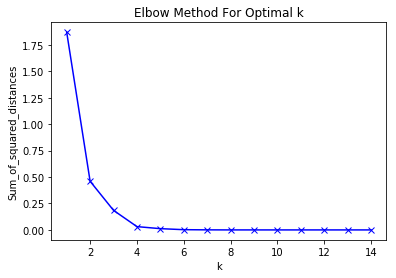

In [49]:
# visualising the values of k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Clustering Neighborhoos

In [50]:
# set optimal number of clusters
toclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=0).fit(to_clustering)

# check cluster labels generated for each row in the dataframe
km.labels_[0:10]

array([ 1,  5, 11, 11, 11,  4,  8, 11, 11,  6], dtype=int32)

In [51]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = to_indian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [52]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,"Adelaide, King, Richmond",0.010000,2
1,Berczy Park,0.017544,2
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0


In [53]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(df_toronto.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(38, 7)


,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide, King, Richmond",0.010000,2,M5H,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,0.017544,2,M5E,Downtown Toronto,43.644771,-79.373306
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0,M6K,West Toronto,43.636847,-79.428191
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0,M7Y,East Toronto,43.662744,-79.321558
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420


In [54]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(38, 7)


,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
18,"Harbord, University of Toronto",0.000000,0,M5S,Downtown Toronto,43.662696,-79.400049
25,North Toronto West,0.000000,0,M4R,Central Toronto,43.715383,-79.405678
24,"Moore Park, Summerhill East",0.000000,0,M4T,Central Toronto,43.689574,-79.383160
23,"Little Portugal, Trinity",0.000000,0,M6J,West Toronto,43.647927,-79.419750
22,Lawrence Park,0.000000,0,M4N,Central Toronto,43.728020,-79.388790
21,"High Park, The Junction South",0.000000,0,M6P,West Toronto,43.661608,-79.464763
20,"Harbourfront, Regent Park",0.000000,0,M5A,Downtown Toronto,43.654260,-79.360636
28,Roselawn,0.000000,0,M5N,Central Toronto,43.711695,-79.416936
36,"The Beaches West, India Bazaar",0.000000,0,M4L,East Toronto,43.668999,-79.315572
17,"Forest Hill North, Forest Hill West",0.000000,0,M5P,Central Toronto,43.696948,-79.411307


## Visualise the clusters

In [55]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [56]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=13)


# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i+x+(i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

In [57]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

# Analysis the Clusters

In [58]:
#Cluster 0
to_merged.loc[to_merged['Cluster Labels'] == 0]
#print(to_merged.loc[to_merged['Cluster Labels'] == 0].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
18,"Harbord, University of Toronto",0.0,0,M5S,Downtown Toronto,43.662696,-79.400049
25,North Toronto West,0.0,0,M4R,Central Toronto,43.715383,-79.405678
24,"Moore Park, Summerhill East",0.0,0,M4T,Central Toronto,43.689574,-79.383160
23,"Little Portugal, Trinity",0.0,0,M6J,West Toronto,43.647927,-79.419750
22,Lawrence Park,0.0,0,M4N,Central Toronto,43.728020,-79.388790
21,"High Park, The Junction South",0.0,0,M6P,West Toronto,43.661608,-79.464763
20,"Harbourfront, Regent Park",0.0,0,M5A,Downtown Toronto,43.654260,-79.360636
28,Roselawn,0.0,0,M5N,Central Toronto,43.711695,-79.416936
36,"The Beaches West, India Bazaar",0.0,0,M4L,East Toronto,43.668999,-79.315572
17,"Forest Hill North, Forest Hill West",0.0,0,M5P,Central Toronto,43.696948,-79.411307


In [59]:
#Cluster 1
to_merged.loc[to_merged['Cluster Labels'] == 1]
#print(to_merged.loc[to_merged['Cluster Labels'] == 1].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
37,"The Danforth West, Riverdale",0.023810,1,M4K,East Toronto,43.679557,-79.352188
11,Davisville,0.028571,1,M4S,Central Toronto,43.704324,-79.388790
5,"Cabbagetown, St. James Town",0.022222,1,M4X,Downtown Toronto,43.667967,-79.367675


In [60]:
#Cluster 2
to_merged.loc[to_merged['Cluster Labels'] == 2]
#print(to_merged.loc[to_merged['Cluster Labels'] == 2].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
9,Church and Wellesley,0.011628,2,M4Y,Downtown Toronto,43.665860,-79.383160
6,Central Bay Street,0.011765,2,M5G,Downtown Toronto,43.657952,-79.387383
32,Stn A PO Boxes 25 The Esplanade,0.010000,2,M5W,Downtown Toronto,43.646435,-79.374846
1,Berczy Park,0.017544,2,M5E,Downtown Toronto,43.644771,-79.373306
19,"Harbourfront East, Toronto Islands, Union Station",0.010000,2,M5J,Downtown Toronto,43.640816,-79.381752
0,"Adelaide, King, Richmond",0.010000,2,M5H,Downtown Toronto,43.650571,-79.384568


In [61]:
#Cluster 3
to_merged.loc[to_merged['Cluster Labels'] == 3]
#print(to_merged.loc[to_merged['Cluster Labels'] == 3].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
34,"The Annex, North Midtown, Yorkville",0.045455,3,M5R,Central Toronto,43.67271,-79.405678


In [64]:
x1 = to_merged.loc[to_merged['Cluster Labels'] == 0]['Indian Restaurant'].mean()
x2 = to_merged.loc[to_merged['Cluster Labels'] == 1]['Indian Restaurant'].mean()
x3 = to_merged.loc[to_merged['Cluster Labels'] == 2]['Indian Restaurant'].mean()
x4 = to_merged.loc[to_merged['Cluster Labels'] == 3]['Indian Restaurant'].mean()


In [65]:
data = [['Cluster 0', x1],['Cluster 1',x2],['Cluster 2', x3],['Cluster 3', x4]]


In [66]:
df = pd.DataFrame(data,columns =['Clusters','Indian restaurant(Mean)'])
df

,Clusters,Indian restaurant(Mean)
0,Cluster 0,0.000000
1,Cluster 1,0.024868
2,Cluster 2,0.011823
3,Cluster 3,0.045455


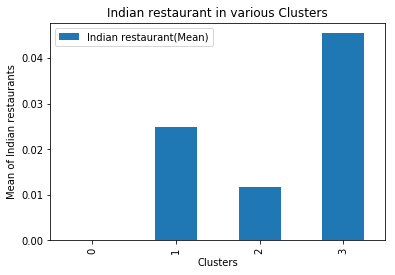

In [67]:
# Visualising the Data
df.plot.bar()
plt.title('Indian restaurant in various Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean of Indian restaurants')
plt.show()

# Observations And Conclusion

> Most of Indian restaurants are in Cluster 3 which is around The Annex, North Midtown, Yorkville. Lowest (close to zero) in Cluster 0 and Cluster 2 areas which are Downtown Toronto, east, west, central Toronto areas. Also, there are good opportunities to open near Downtown,east, west Toronto as the competition seems to be low. Looking at nearby venues, it seems Cluster 0 and cluster 2 might be a good location as there are not a lot of Asian restaurants in these areas. Therefore, this project recommends the entrepreneur to open a reliable South Indian restaurant in these locations with little to no competition. Nonetheless, if the food is Delicious ,reliable, and affordable, I am confident that it will have great demand everywhere!